In [1]:
# Importing aux libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import gempy as gp

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable efl


c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Optimized (vendor) Blas libraries are not found.
    Falls back to netlib Blas library which has worse performance.
    A better performance should be easily gained by switching
    Blas library.
  if self._calc_info(blas):
c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Blas (http://www.netlib.org/blas/) libraries not found.
    Directories to search for the libraries can be specified in the
    numpy/distutils/site.cfg file (section [blas]) or by setting
    the BLAS environment variable.
  if self._calc_info(blas):
c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Blas (http://www.netlib.org/blas/) sources not found.
    Directories to search for the sources can be specified in the
    numpy/distutils/site.cfg file (section [blas_src]) or by setting
    t

In [3]:
geo_model = gp.create_model('Perarolo_3')

In [4]:
data_path = 'C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [60, 220., -60., 60., 0, 140.], [50, 50, 50],
             path_i=data_path + "layer_i_nf.csv",
             path_o=data_path + "layer_o_nf.csv",
             default_values=True)

Active grids: ['regular']


Perarolo_3  2024-05-09 15:54

In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {#"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('gravely_layer', 'clay_layer',
                                           'altered_bedrock')},
                         remove_unused_series=True)
#"Fault_Series": 'Main_Fault',

,surface,series,order_surfaces,color,id
0,gravely_layer,Strat_Series,1,#015482,1
1,clay_layer,Strat_Series,2,#9f0052,2
2,altered_bedrock,Strat_Series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [6]:
section_dict = {'section1': ([60, 0], [220, 0], [50, 50]),
                'section2': ([170, 60], [170, -60], [50, 50])}  # p1,p2,resolution
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'sections']


,start,stop,resolution,dist
section1,"[60, 0]","[220, 0]","[50, 50]",160.0
section2,"[170, 60]","[170, -60]","[50, 50]",120.0


In [7]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [6]:
gp.set_interpolator(geo_model,          
                    compile_theano=False,
                    theano_optimizer='fast_compile',
                    )

#with compile_theano=True it's really slow

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                       values
range             244.131112
$C_o$            1419.047619
drift equations       [3, 3]


In [9]:
fp = data_path+ "topo_1_extrap.tif"
fp

'C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/topo_1_extrap.tif'

In [10]:

geo_model.set_topography(source='gdal', filepath=fp)
sol = gp.compute_model(geo_model, compute_mesh=True)

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']


In [7]:
#NO TOPOGRAPHY
sol = gp.compute_model(geo_model, compute_mesh=True)

In [8]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, plotter_type='basic', show_surfaces=True, show_data=True, image=False,
                 show_topography=True)

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [11]:
model_dyke = gp.create_model('Perarolo_dyke_1')

In [12]:
data_path = 'C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(model_dyke, [60, 220., -60., 60., 0, 140.], [100, 100, 100],
             path_i=data_path + "layer_i_dyke_v2.csv",
             path_o=data_path + "layer_o_dyke_v2.csv",
             default_values=True)

Active grids: ['regular']


Perarolo_dyke_1  2024-05-03 09:57

In [13]:
# Assign formations to series
gp.map_series_to_surfaces(model_dyke,
                         {"Sed_series": ('Top', 'Bottom')},
                         remove_unused_series=True)
model_dyke.surfaces

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,bottom,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [14]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(model_dyke,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                       values
range             244.131112
$C_o$            1419.047619
drift equations       [3, 3]


In [15]:
# Compute the model
sol_dyke = gp.compute_model(model_dyke, compute_mesh=True)

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


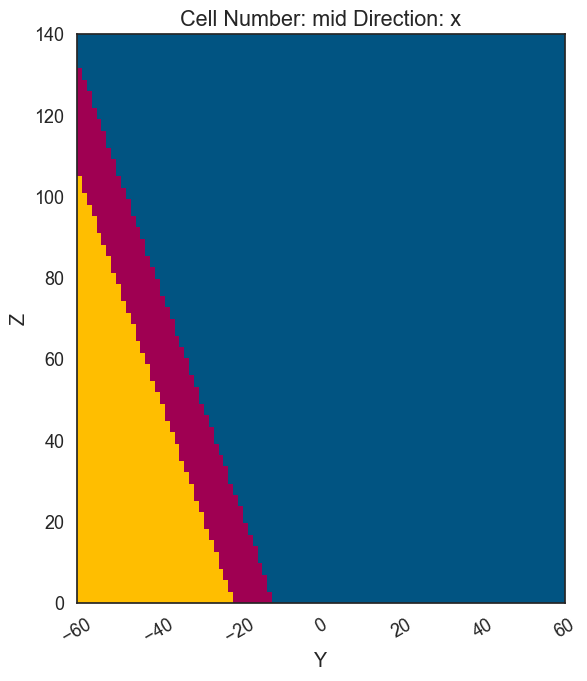

In [16]:
gp.plot_2d(model_dyke, direction='x', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)

In [ ]:
model_dyke.set_topography(source='gdal', filepath=fp)
sol_dyke = gp.compute_model(model_dyke, compute_mesh=True)

In [17]:
sol_dyke = gp.compute_model(model_dyke, compute_mesh=True)

In [18]:
ver, sim = gp.get_surfaces(model_dyke)
gpv = gp.plot_3d(model_dyke, plotter_type='basic', show_surfaces=True, show_data=True, image=False,
                 show_topography=False)

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [ ]:
geo_model.surfaces

In [ ]:
# We want to know where the model result voxels have the ID 2, which reflects the red layer in the plot above.
inds = np.where(sol_dyke.lith_block==2)
sol.lith_block[inds] = 1

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


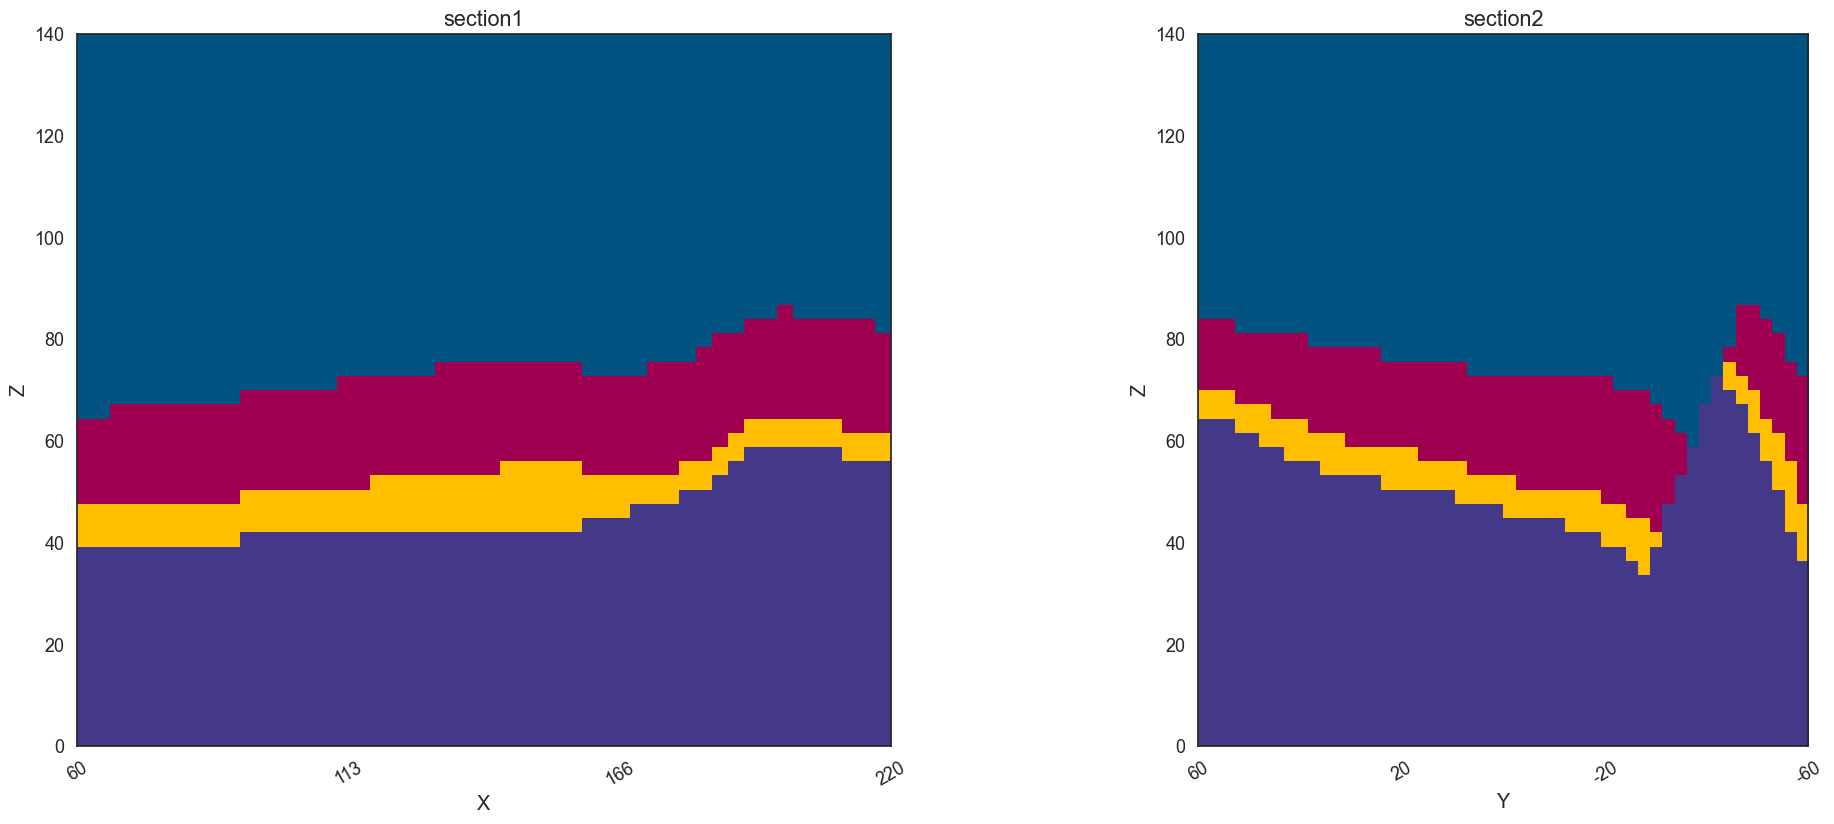

In [19]:
gp.plot_2d(geo_model, section_names=['section1', 'section2'], show_block=True, show_boundaries=False, 
           show_data=False, show_results=True, show_topography=False)

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


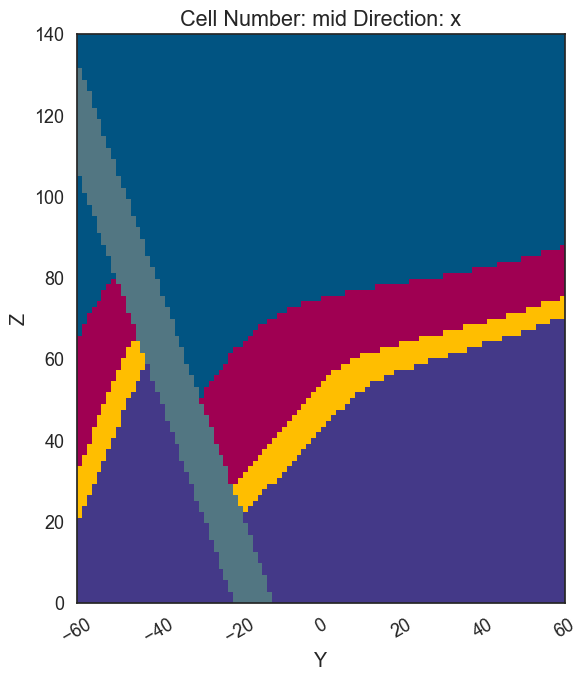

In [ ]:
gp.plot_2d(geo_model, direction='x', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True, show_topography=False)

In [ ]:
gp.plot_3d(geo_model, plotter_type='basic', show_surfaces=False, show_lith=True)

c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [ ]:
#Blender export

vertices, faces = gp.get_surfaces(geo_model)

# enter values to shift model
x0, y0, z0 = 0, 0, 0

# save model
for i in range(len(vertices)):
    np.save('Data/Blender/vertices/' + 'vert_%02d.npy' %(i), vertices[i]-[x0, y0, z0])
    np.save('Data/Blender/faces/' + 'faces_%02d.npy' %(i), faces[i])
    print(len(vertices[i]))



In [99]:
#Blender export ONE BY ONE

vertices, faces = gp.get_surfaces(geo_model)

# enter values to shift model
x0, y0, z0 = 0, 0, 0
print(len(vertices))
i = 1
np.save('Data/Blender/vertices/' + 'vert_%02d.npy' %(i), vertices[i]-[x0, y0, z0])
np.save('Data/Blender/faces/' + 'faces_%02d.npy' %(i), faces[i])
print(len(vertices[i]))


4
4591


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
geo_model.solutions.lith_block

In [94]:
#Function backup, the real one is in the file 'export_topo_operative.py'

def export_flac3D_input(geo_model, path=None, filename='geomodel.f3grid'):
 
    # create vertices and elements
    vertices, elements, groups = __build_vertices_elements_groups__(geo_model)

    # open output file
    # if not path:
    #    path = './'
    # if not os.path.exists(path):
    #    os.makedirs(path)

    out = open(path + filename, 'w')

    # write gridpoints
    out.write("*GRIDPOINTS")
    for i, vertice in enumerate(vertices):
        out.write(f"\nG {i + 1} {vertice[0]} {vertice[1]} {vertice[2]}")

    # write elements
    out.write('\n*ZONES')
    zone_counter = 1 

    new_column_order = [1, 2, 4, 5, 3, 8, 6, 7]

    for i, elem in enumerate(elements):
        out.write(f'\nZ B8 {zone_counter}')  
        for x in new_column_order:
            out.write(f" {elem[x]}")
        zone_counter += 1 

    # make groups
    out.write('\n*GROUPS\n')
    for grp_name, grp in groups.items():
        out.write(f'ZGROUP \"{grp_name}\"\n')
        count = 0
        for x in grp:
            out.write(f"{x} ")
            count += 1
            if count == 8:
                out.write("\n")
                count = 0
        if count != 0: out.write("\n")

    out.close()
    print("Successfully exported geological model as FLAC3D input to " + path)
    return 


def __build_vertices_elements_groups__(geo_model):

    # get model information
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

    # create vertices array
    dx, dy, dz = (xmax - xmin) / nx, (ymax - ymin) / ny, (zmax - zmin) / nz
    n_vertices = (nx + 1) * (ny + 1) * (nz + 1)
    vertices = np.zeros((n_vertices, 3), dtype='f8')
    vertices_ids = np.arange(n_vertices)  # used to generate coordinate
    vertices[:, 0] = vertices_ids % (nx + 1) * dx + xmin
    vertices[:, 1] = (vertices_ids % ((nx + 1) * (ny + 1))) // (nx + 1) * dy + ymin
    vertices[:, 2] = vertices_ids // ((nx + 1) * (ny + 1)) * dz + zmin

    # build elements
    n_elements = nx * ny * nz
    element_ids = np.arange(n_elements)  # used to generate elems
    elements = np.zeros((n_elements, 9), dtype='i8')
    i = element_ids % nz
    j = element_ids // nz % ny
    k = element_ids // (nz * ny)
    elements[:, 0] = 8  # all hex
    elements[:, 1] = 1 + i * (nx + 1) * (ny + 1) + j * (nx + 1) + k
    elements[:, 2] = elements[:, 1] + 1
    elements[:, 3] = elements[:, 2] + (nx + 1)
    elements[:, 4] = elements[:, 3] - 1
    elements[:, 5] = elements[:, 1] + ((nx + 1) * (ny + 1))
    elements[:, 6] = elements[:, 5] + 1
    elements[:, 7] = elements[:, 6] + (nx + 1)
    elements[:, 8] = elements[:, 7] - 1

    # build groups
    lith_ids = np.round(geo_model.solutions.lith_block)
    lith_ids = lith_ids.astype(int)
    sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
    groups = {}
    for region_name, region_id in sids.items():
        cell_ids = np.where(lith_ids == region_id)[0] + 1
        if not len(cell_ids): continue
        groups[region_name] = cell_ids

    # remove element above topography
    #mask_topo = geo_model._grid.regular_grid.mask_topo
    shape = geo_model._grid.regular_grid.resolution
    shape_tot = shape[0]*shape[1]*shape[2]
    mask_topo = geo_model._grid.regular_grid.mask_topo
    if(mask_topo.size > 0):
        inactive_cells = mask_topo.reshape(shape_tot)
    else:
        inactive_cells = None
    if np.any(inactive_cells):
        # update correspondance
        new_id_vertices = np.zeros(len(vertices), dtype='i8')
        new_id_elements = np.zeros(len(elements), dtype='i8')
        # remove inactive cell
        elements = elements[~inactive_cells]
        new_id_elements[~inactive_cells] = np.arange(len(elements)) + 1
        # remove deleted vertices
        cond = np.isin(np.arange(len(vertices)) + 1, elements[:, 1:].flatten())
        vertices = vertices[cond]
        new_id_vertices[cond] = np.arange(len(vertices)) + 1
        # renumber vertices in element
        elements[1:] = new_id_vertices[elements[1:] - 1]
        # renumber groups
        for grp in groups.values():
            grp[:] = new_id_elements[grp - 1]

    return vertices, elements, groups

In [27]:
#Try to export the surface with W6 block type
path=data_path
filename='geomodel_topo_10.f3grid'

def __build_vertices_elements_groups__2(geo_model):

    # get model information
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

    # create vertices array
    dx, dy, dz = (xmax - xmin) / nx, (ymax - ymin) / ny, (zmax - zmin) / nz
    n_vertices = (nx + 1) * (ny + 1) * (nz + 1)
    vertices = np.zeros((n_vertices, 3), dtype='f8')
    vertices_ids = np.arange(n_vertices)  # used to generate coordinate
    vertices[:, 0] = vertices_ids % (nx + 1) * dx + xmin
    vertices[:, 1] = (vertices_ids % ((nx + 1) * (ny + 1))) // (nx + 1) * dy + ymin
    vertices[:, 2] = vertices_ids // ((nx + 1) * (ny + 1)) * dz + zmin

    # build groups
    lith_ids = np.round(geo_model.solutions.lith_block)
    lith_ids = lith_ids.astype(int)
    sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
    groups = {}
    for region_name, region_id in sids.items():
        cell_ids = np.where(lith_ids == region_id)[0] + 1
        if not len(cell_ids): continue
        groups[region_name] = cell_ids

    # build elements
    n_elements = nx * ny * nz
    element_ids = np.arange(n_elements)  # used to generate elems
    elements = np.zeros((n_elements, 9), dtype='i8')
    i = element_ids % nz
    j = element_ids // nz % ny
    k = element_ids // (nz * ny)
    elements[:, 0] = 8  # all hex
    elements[:, 1] = 1 + i * (nx + 1) * (ny + 1) + j * (nx + 1) + k
    elements[:, 2] = elements[:, 1] + 1
    elements[:, 5] = elements[:, 2] + (nx + 1)
    elements[:, 3] = elements[:, 5] - 1
    elements[:, 4] = elements[:, 1] + ((nx + 1) * (ny + 1))
    elements[:, 7] = elements[:, 4] + 1
    elements[:, 8] = elements[:, 7] + (nx + 1)
    elements[:, 6] = elements[:, 8] - 1

     # remove element above topography
    #mask_topo = geo_model._grid.regular_grid.mask_topo
    shape = geo_model._grid.regular_grid.resolution
    shape_tot = shape[0]*shape[1]*shape[2]
    mask_topo = geo_model._grid.regular_grid.mask_topo
    if(mask_topo.size > 0):
        inactive_cells = mask_topo.reshape(shape_tot)
    else:
        inactive_cells = None
    if np.any(inactive_cells):
        # update correspondance
        new_id_vertices = np.zeros(len(vertices), dtype='i8')
        new_id_elements = np.zeros(len(elements), dtype='i8')
        # remove inactive cell
        elements = elements[~inactive_cells]
        new_id_elements[~inactive_cells] = np.arange(len(elements)) + 1
        # remove deleted vertices
        cond = np.isin(np.arange(len(vertices)) + 1, elements[:, 1:].flatten())
        vertices = vertices[cond]
        new_id_vertices[cond] = np.arange(len(vertices)) + 1
        # renumber vertices in element
        elements[1:] = new_id_vertices[elements[1:] - 1]
        # renumber groups
        for grp in groups.values():
            grp[:] = new_id_elements[grp - 1]

    return vertices, elements, groups

# create vertices and elements
vertices, elements, groups = __build_vertices_elements_groups__2(geo_model)

# open output file
# if not path:
#    path = './'
# if not os.path.exists(path):
#    os.makedirs(path)

out = open(path + filename, 'w')

# write gridpoints
out.write("*GRIDPOINTS")
for i, vertice in enumerate(vertices):
    out.write(f"\nG {i + 1} {vertice[0]} {vertice[1]} {vertice[2]}")

#write elements
out.write('\n*ZONES')
for i,elem in enumerate(elements):
    out.write('\nB8')
    for x in elem[1:]:
        out.write(f" {x}")

# make groups
out.write('\n*GROUPS\n')
for grp_name, grp in groups.items():
    out.write(f'ZGROUP \"{grp_name}\"\n')
    count = 0
    for x in grp:
        out.write(f"{x} ")
        count += 1
        if count == 8:
            out.write("\n")
            count = 0
    if count != 0: out.write("\n")

out.close()
print("Successfully exported geological model as FLAC3D input to " + path)


Successfully exported geological model as FLAC3D input to C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/


In [50]:
import pandas as pd

data = {'X': vertices[:,0],
        'Y': vertices[:,1],
        'Z': vertices[:,2]
}

df = pd.DataFrame(data)
df_sort = df.sort_values(by = ['X','Y','Z'])
print(df_sort)

tfi = df.groupby(['X','Y'])['Z'].transform('max') == df['Z']
tfi_i = np.invert(tfi)
df_2 = df[tfi_i]
tfi_2 = df_2.groupby(['X','Y'])['Z'].transform('max') == df_2['Z']

print(df[tfi])
print(df_2[tfi_2])

            X     Y      Z
0        60.0 -60.0    0.0
2601     60.0 -60.0    2.8
5202     60.0 -60.0    5.6
7803     60.0 -60.0    8.4
10404    60.0 -60.0   11.2
...       ...   ...    ...
122246  220.0  60.0  128.8
124847  220.0  60.0  131.6
127448  220.0  60.0  134.4
130049  220.0  60.0  137.2
132650  220.0  60.0  140.0

[132651 rows x 3 columns]
            X     Y      Z
130050   60.0 -60.0  140.0
130051   63.2 -60.0  140.0
130052   66.4 -60.0  140.0
130053   69.6 -60.0  140.0
130054   72.8 -60.0  140.0
...       ...   ...    ...
132646  207.2  60.0  140.0
132647  210.4  60.0  140.0
132648  213.6  60.0  140.0
132649  216.8  60.0  140.0
132650  220.0  60.0  140.0

[2601 rows x 3 columns]
            X     Y      Z
127449   60.0 -60.0  137.2
127450   63.2 -60.0  137.2
127451   66.4 -60.0  137.2
127452   69.6 -60.0  137.2
127453   72.8 -60.0  137.2
...       ...   ...    ...
130045  207.2  60.0  137.2
130046  210.4  60.0  137.2
130047  213.6  60.0  137.2
130048  216.8  60.0  137.2
130

In [ ]:
df_surf = df[tfi]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_surf.X,df_surf.Y,df_surf.Z, c='b')
ax.scatter(df_surf.X,df_surf.Y,df_surf.Z, c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

df_surf = df_2[tfi_2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_surf.X,df_surf.Y,df_surf.Z, c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
nx, ny, nz = geo_model.grid.regular_grid.resolution
n_elements = nx * ny * nz
print(n_elements)

idx = df.index.values[tfi]
idx_2 = df_2.index.values[tfi_2] 

print(idx)
print(idx_2)

125000


NameError: name 'df' is not defined

In [78]:
#PROVA CON INDICI ORIGINALI ROUSSEAU
    # create vertices and elements



def __build_vertices_elements_groups__(geo_model):

    # get model information
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

    # create vertices array
    dx, dy, dz = (xmax - xmin) / nx, (ymax - ymin) / ny, (zmax - zmin) / nz
    n_vertices = (nx + 1) * (ny + 1) * (nz + 1)
    vertices = np.zeros((n_vertices, 3), dtype='f8')
    vertices_ids = np.arange(n_vertices)  # used to generate coordinate
    vertices[:, 0] = vertices_ids % (nx + 1) * dx + xmin
    vertices[:, 1] = (vertices_ids % ((nx + 1) * (ny + 1))) // (nx + 1) * dy + ymin
    vertices[:, 2] = vertices_ids // ((nx + 1) * (ny + 1)) * dz + zmin

    # build elements
    n_elements = nx * ny * nz
    element_ids = np.arange(n_elements)  # used to generate elems
    elements = np.zeros((n_elements, 9), dtype='i8')
    i = element_ids % nz
    j = element_ids // nz % ny
    k = element_ids // (nz * ny)
    elements[:, 0] = 8  # all hex
    elements[:, 1] = 1 + i * (nx + 1) * (ny + 1) + j * (nx + 1) + k
    elements[:, 2] = elements[:, 1] + 1
    elements[:, 3] = elements[:, 2] + (nx + 1)
    elements[:, 4] = elements[:, 3] - 1
    elements[:, 5] = elements[:, 1] + ((nx + 1) * (ny + 1))
    elements[:, 6] = elements[:, 5] + 1
    elements[:, 7] = elements[:, 6] + (nx + 1)
    elements[:, 8] = elements[:, 7] - 1

    # build groups
    lith_ids = np.round(geo_model.solutions.lith_block)
    lith_ids = lith_ids.astype(int)
    sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
    groups = {}
    for region_name, region_id in sids.items():
        cell_ids = np.where(lith_ids == region_id)[0] + 1
        if not len(cell_ids): continue
        groups[region_name] = cell_ids

    # remove element above topography
    #mask_topo = geo_model._grid.regular_grid.mask_topo
    shape = geo_model._grid.regular_grid.resolution
    shape_tot = shape[0]*shape[1]*shape[2]
    mask_topo = geo_model._grid.regular_grid.mask_topo
    if(mask_topo.size > 0):
        inactive_cells = mask_topo.reshape(shape_tot)
    else:
        inactive_cells = None
    if np.any(inactive_cells):
        # update correspondance
        new_id_vertices = np.zeros(len(vertices), dtype='i8')
        new_id_elements = np.zeros(len(elements), dtype='i8')
        # remove inactive cell
        elements = elements[~inactive_cells]
        new_id_elements[~inactive_cells] = np.arange(len(elements)) + 1
        # remove deleted vertices
        cond = np.isin(np.arange(len(vertices)) + 1, elements[:, 1:].flatten())
        vertices = vertices[cond]
        new_id_vertices[cond] = np.arange(len(vertices)) + 1
        # renumber vertices in element
        elements[1:] = new_id_vertices[elements[1:] - 1]
        # renumber groups
        for grp in groups.values():
            grp[:] = new_id_elements[grp - 1]

    return vertices, elements, groups


vertices, elements, groups = __build_vertices_elements_groups__(geo_model)

# open output file
# if not path:
#    path = './'
# if not os.path.exists(path):
#    os.makedirs(path)

out = open(path + filename, 'w')

# write gridpoints
out.write("*GRIDPOINTS")
for i, vertice in enumerate(vertices):
    out.write(f"\nG {i + 1} {vertice[0]} {vertice[1]} {vertice[2]}")

# write elements
out.write('\n*ZONES')
zone_counter = 1 

new_column_order = [1, 2, 4, 5, 3, 8, 6, 7]

for i, elem in enumerate(elements):
    out.write(f'\nZ B8 {zone_counter}')  
    for x in new_column_order:
        out.write(f" {elem[x]}")
    zone_counter += 1 

# make groups
out.write('\n*GROUPS\n')
for grp_name, grp in groups.items():
    out.write(f'ZGROUP \"{grp_name}\"\n')
    count = 0
    for x in grp:
        out.write(f"{x} ")
        count += 1
        if count == 8:
            out.write("\n")
            count = 0
    if count != 0: out.write("\n")

out.close()
print("Successfully exported geological model as FLAC3D input to " + path)

Successfully exported geological model as FLAC3D input to C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/


In [37]:
nx, ny, nz = geo_model.grid.regular_grid.resolution
n_elements = nx * ny * nz

# build groups
lith_ids = np.round(geo_model.solutions.lith_block)
lith_ids = lith_ids.astype(int)
sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
groups = {}
for region_name, region_id in sids.items():
    cell_ids = np.where(lith_ids == region_id)[0] + 1
    if not len(cell_ids): continue
    groups[region_name] = cell_ids

lis_others = []
lis_z = []
lis_plane = []
lis_xx1 = []
lis_xx2 = []
lis_yy1 = []
lis_yy2 = []

#SEARCH THE SURFACES INSIDE THE MODEL
# +1        moves in Z axis
# +nz       moves in Y axis
# +(nz*ny)  moves in X axis
i = []
roof = {}
count=0
df=[]

# for z in range(0,nz,1):
#     for x in range(z,z+(nz)*(ny)*(nx),(nz)*(ny)):
#         i.append(x)
#         for y in range(x+nx,x+(nz*ny), nz):
#             i.append(y)

# for z in range(0,nz,1):
#     for y in range(z,nz*nx,nz):
#         for x in range(y,nz*ny*nz,nz*ny):
#             i.append(x)
#             if z > 0 and z < nz -1:
#                 if lith_ids[x] != lith_ids[x+1]:
#                     lis_z.append(x)
#                     df.append([lith_ids[x],lith_ids[x+1]])
#                     #print(lith_ids[x-1], lith_ids[x], lith_ids[x+1])
#                 else:
#                     lis_others.append(x)
#             if z == nz -1:
#                 roof.append(x)
#             else:
#                 lis_others.append(x)

for x in range(0,nz*ny*nx,nz*ny):
    for y in range(x,x+nz*ny,nz):
        for z in range(y,y+nz,1):
            i.append(z)
            if z < y+nz-1:
                lis_z.append(z)
                if lith_ids[z]!=lith_ids[z+1]:
                    roof.update({z:[lith_ids[z], lith_ids[z+1]]})
                    #print(lith_ids[z], lith_ids[z+1])
                #the size of lis_z is nx*ny less than the complete matrix, it miss the last z data (the top)




# print(i)
#print(np.size(i,0))
#print(np.size(lith_ids[lis_z],0))
#print(lith_ids[lis_z])
print(roof)
print(len(roof))
print(len(i))
print(len(lis_z))

{13: [4, 3], 16: [3, 2], 24: [2, 1], 63: [4, 3], 67: [3, 2], 74: [2, 1], 114: [4, 3], 117: [3, 2], 125: [2, 1], 164: [4, 3], 168: [3, 2], 175: [2, 1], 215: [4, 3], 218: [3, 2], 225: [2, 1], 265: [4, 3], 268: [3, 2], 276: [2, 1], 316: [4, 3], 319: [3, 2], 326: [2, 1], 366: [4, 3], 369: [3, 2], 376: [2, 1], 416: [4, 3], 420: [3, 2], 427: [2, 1], 467: [4, 3], 470: [3, 2], 477: [2, 1], 517: [4, 3], 520: [3, 2], 527: [2, 1], 568: [4, 3], 571: [3, 2], 578: [2, 1], 618: [4, 3], 621: [3, 2], 628: [2, 1], 668: [4, 3], 671: [3, 2], 678: [2, 1], 719: [4, 3], 722: [3, 2], 728: [2, 1], 769: [4, 3], 772: [3, 2], 779: [2, 1], 820: [4, 3], 822: [3, 2], 829: [2, 1], 870: [4, 3], 873: [3, 2], 879: [2, 1], 920: [4, 3], 923: [3, 2], 930: [2, 1], 971: [4, 3], 974: [3, 2], 980: [2, 1], 1021: [4, 3], 1024: [3, 2], 1030: [2, 1], 1072: [4, 3], 1074: [3, 2], 1080: [2, 1], 1122: [4, 3], 1125: [3, 2], 1131: [2, 1], 1172: [4, 3], 1175: [3, 2], 1181: [2, 1], 1223: [4, 3], 1225: [3, 2], 1231: [2, 1], 1273: [4, 3], 1

In [79]:
import copy

i_4_3 = []
i_3_2 = []
i_2_1 = []
i_n_m = []
#new_el = elements[:]
new_el = copy.deepcopy(elements)
size = np.size(elements,0)
# for x in roof:
#     if roof[x] == [4, 3]:
#         i_4_3.append(x)
#     if roof[x] == [3, 2]:
#         i_3_2.append(x)
#     if roof[x] == [2, 1]:
#         i_2_1.append(x)

for x in roof:
    for l1 in range(len(groups)+1):
        for l2 in range(len(groups)+1):
            if roof[x] == [l2, l1-1]:
                print(roof[x], elements[x,:])
                new_el[x,7] = elements[x,4]
                new_el[x,8] = elements[x,6]
                print(roof[x], new_el[x,:])
                new_row = elements[x,:]
                print(roof[x], elements[x,:])
                #new_elements.append(elements[x,:])
                


[4, 3] [    8 33814 33815 33866 33865 36415 36416 36467 36466]
[4, 3] [    8 33814 33815 33866 33865 36415 36416 33865 36416]
[4, 3] [    8 33814 33815 33866 33865 36415 36416 36467 36466]
[3, 2] [    8 41617 41618 41669 41668 44218 44219 44270 44269]
[3, 2] [    8 41617 41618 41669 41668 44218 44219 41668 44219]
[3, 2] [    8 41617 41618 41669 41668 44218 44219 44270 44269]
[2, 1] [    8 62425 62426 62477 62476 65026 65027 65078 65077]
[2, 1] [    8 62425 62426 62477 62476 65026 65027 62476 65027]
[2, 1] [    8 62425 62426 62477 62476 65026 65027 65078 65077]
[4, 3] [    8 33865 33866 33917 33916 36466 36467 36518 36517]
[4, 3] [    8 33865 33866 33917 33916 36466 36467 33916 36467]
[4, 3] [    8 33865 33866 33917 33916 36466 36467 36518 36517]
[3, 2] [    8 44269 44270 44321 44320 46870 46871 46922 46921]
[3, 2] [    8 44269 44270 44321 44320 46870 46871 44320 46871]
[3, 2] [    8 44269 44270 44321 44320 46870 46871 46922 46921]
[2, 1] [    8 62476 62477 62528 62527 65077 65078 65129

In [70]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [83]:
fig = plt.figure()
a = np.reshape(lith_ids, [50,50,50], order = 'F')


print(a[:,1,0])

plt.show()

[5 5 5 5 5 5 5 4 4 4 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


<Figure size 1040x715 with 0 Axes>

In [173]:
for x in range(0,len(lith_ids),1):
    i.append(x)
    if x < :
        if lith_ids[x] != lith_ids[x+1]:
            lis_z.append(x)
        else:
            lis_others.append(x)    
    else:
        lis_z.append(x)

lith_ids_sel = lith_ids[lis2]

ind = dict()
for i, val in enumerate(lith_ids_sel):
  ind.setdefault(val, []).append(i)
a = range(0,nz,1)
b = range(0,(nz)*(ny),nx)
c = range(0,(nz)*(ny)*(nx),(nz)*(n))


i = []
blocks = []
for x in a:
  i.append(x)
  blocks.append(lith_ids[x])
print(i)  
print(blocks)
i = []
blocks = []
for x in b:
  i.append(x)
  blocks.append(lith_ids[x])
print(i)  
print(blocks)
i = []
blocks = []
for x in c:
  i.append(x)
  blocks.append(lith_ids[x])
print(i)  
print(blocks)
i = []
blocks = []

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000, 52500, 55000, 57500, 60000, 62500, 65000, 67500, 70000, 72500, 75000, 77500, 80000, 8250

In [56]:
# get model information
nx, ny, nz = geo_model.grid.regular_grid.resolution
xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

# create vertices array
dx, dy, dz = (xmax - xmin) / nx, (ymax - ymin) / ny, (zmax - zmin) / nz
n_vertices = (nx + 1) * (ny + 1) * (nz + 1)
vertices = np.zeros((n_vertices, 3), dtype='f8')
vertices_ids = np.arange(n_vertices)  # used to generate coordinate
vertices[:, 0] = vertices_ids % (nx + 1) * dx + xmin
vertices[:, 1] = (vertices_ids % ((nx + 1) * (ny + 1))) // (nx + 1) * dy + ymin
vertices[:, 2] = vertices_ids // ((nx + 1) * (ny + 1)) * dz + zmin

# build elements
n_elements = nx * ny * nz
element_ids = np.arange(n_elements)  # used to generate elems
elements = np.zeros((n_elements, 9), dtype='i8')
i = element_ids % nz
j = element_ids // nz % ny
k = element_ids // (nz * ny)
elements[:, 0] = 8  # all hex
elements[:, 1] = 1 + i * (nx + 1) * (ny + 1) + j * (nx + 1) + k
elements[:, 2] = elements[:, 1] + 1
elements[:, 5] = elements[:, 2] + (nx + 1)
elements[:, 3] = elements[:, 5] - 1
elements[:, 4] = elements[:, 1] + ((nx + 1) * (ny + 1))
elements[:, 7] = elements[:, 4] + 1
elements[:, 8] = elements[:, 7] + (nx + 1)
elements[:, 6] = elements[:, 8] - 1

print(np.size(elements,0))

125000


In [22]:
print(np.size(lith_ids))

125000


In [36]:
#FLAC3D export
export_flac3D_input(geo_model, path=data_path, filename='geomodel_topo_10.f3grid')

TypeError: bad operand type for unary ~: 'NoneType'

TEST ABOUT SMOOTHING THE SURFACES

In [12]:
nx, ny, nz = geo_model.grid.regular_grid.resolution
lith_ids = np.round(geo_model.solutions.lith_block)
lith_ids = lith_ids.astype(int)
sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
groups = {}
for region_name, region_id in sids.items():
    cell_ids = np.where(lith_ids == region_id)[0] + 1
    if not len(cell_ids): continue
    groups[region_name] = cell_ids

print(groups)
print(geo_model.solutions.lith_block)
print(geo_model._grid.values)

shape = geo_model._grid.regular_grid.resolution
shape_tot = shape[0]*shape[1]*shape[2]
blocks = geo_model._grid.values

x_min, x_max, y_min, y_max, z_min, z_max = geo_model._grid.regular_grid.extent

z_val = blocks[:,2]
new_z = np.zeros((nx,ny))


{'gravely_layer': array([    17,     18,     19, ..., 124998, 124999, 125000], dtype=int64), 'clay_layer': array([     9,     10,     11, ..., 124981, 124982, 124983], dtype=int64), 'altered_bedrock': array([     7,      8,     58, ..., 124973, 124974, 124975], dtype=int64), 'basement': array([     1,      2,      3, ..., 124970, 124971, 124972], dtype=int64)}
[5. 5. 5. ... 2. 2. 2.]
[[ 61.6        -58.8          1.4       ]
 [ 61.6        -58.8          4.2       ]
 [ 61.6        -58.8          7.        ]
 ...
 [170.         -60.         134.28571429]
 [170.         -60.         137.14285714]
 [170.         -60.         140.        ]]


In [234]:
count_i = 0
count_j = 0
count_z = 0
size = np.size(blocks[:,0])

for i in size
    

130000

In [34]:
dir(geo_model.solutions)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_prepare_marching_cubes_args',
 '_scalar_field_at_surface',
 '_try_compute_marching_cubes_on_the_regular_grid',
 'block_at_surface_points',
 'block_matrix',
 'compute_all_surfaces',
 'compute_marching_cubes_regular_grid',
 'custom',
 'edges',
 'fault_block',
 'fault_mask',
 'fw_gravity',
 'fw_magnetics',
 'geological_map',
 'gradient',
 'grid',
 'lith_block',
 'mask_at_surface_points',
 'mask_matrix',
 'mask_matrix_pad',
 'padding_mask_matrix',
 'scalar_field_at_surface_points',
 'scalar_field_matrix',
 'sections',
 'set_solution_to_custom',
 'set_solution_to_regular_grid',
 'set_solution_to_sections',
 'set_solution_to_